# <font color='brown'>使用 Matplotlib 绘制 2D 和 3D 图形</font>

## 实验介绍

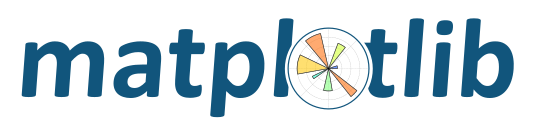
在使用机器学习方法解决问题的过程中，一定会遇到需要针对数据进行绘图的场景。Matplotlib 是支持 Python 语言的开源绘图库，因为其支持丰富的绘图类型、简单的绘图方式以及完善的接口文档，深受 Python 工程师、科研学者、数据工程师等各类人士的喜欢。Matplotlib 拥有着十分活跃的社区以及稳定的版本迭代，当我们在学习机器学习的课程时，掌握 Matplotlib 的使用无疑是最重要的准备工作之一。本次实验课程中，我们将学会使用 Matplotlib 绘制 2D 和 3D 图形的方法和技巧。

### 实验知识点

本次实验涉及的知识点主要有：
- 兼容 MATLAB 代码风格 API
- 图名称、坐标轴名称、图例
- 线型、颜色、透明度
- 画布网格、坐标轴范围
- 其他 2D 图形
- 3D 图形

### 实验环境

- Python 3.6
- Matplotlab: 2.2.2

### 索引目录

- <a href="#1">1. 兼容 MATLAB 代码风格 API</a>
- <a href="#2">2. Matplotlib 面向对象 API（推荐）</a>
- <a href="#3">3. 实验总结</a>

---

在使用 Notebook 环境绘图时，需要先运行 `%matplotlib inline` 命令。这条命令的作用是将 matplotlib 绘制的图形嵌入在当前页面中。

In [1]:
%matplotlib inline

## <a id = "1">1. 兼容 MATLAB 代码风格 API</a>

相信很多学理工科的同学都使用过 MATLAB，它是一种用于算法开发、数据可视化、数据分析以及数值计算的高级技术计算语言和交互式环境。而在 Matplotlib 中，也提供了和 MATLAB 相似的 API。对于使用过 MATLAB 的同学而言，这将是入门 Matplotlib 最快的方式。

In [2]:
"""使用 matplotlib 提供的兼容 MATLAB API，需要导入 pylab 模块
"""
from matplotlib import pylab

In [3]:
"""使用 NumPy 生成随机数据
"""
import numpy as np

x = np.linspace(0, 10, 20)
y = x * x + 2

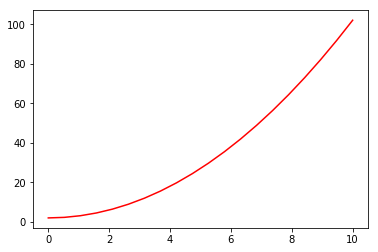

In [4]:
"""只需要 1 句命令就可以完成绘图
"""
pylab.plot(x, y, 'r') # 'r' 代表 red

如果我们要绘制子图，就可以使用 `subplot` 方法

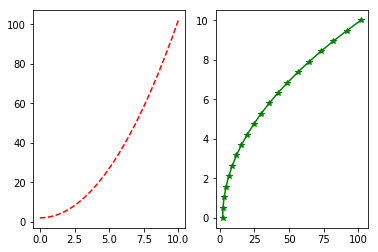

In [5]:
"""绘制子图
"""
pylab.subplot(1,2,1) # 括号中内容代表（行，列，索引）
pylab.plot(x, y, 'r--') # ‘’ 中的内容确定了颜色和线型

pylab.subplot(1,2,2)
pylab.plot(y, x, 'g*-')

使用兼容 MATLAB 风格的 API 的好处在于，如果熟悉 MATLAB，那么将很快上手使用 Python 绘图。不过，除了一些简单的图形之外，并**不鼓励使用**兼容MATLAB 的 API。

于此同时，实验更加建议学习和使用 Matplotlib 提供的面向对象 API，它更加强大和好用。

## <a id = "1">2. Matplotlib 面向对象 API（推荐）</a>

In [6]:
"""使用 matplotlib 提供的面向对象 API，需要导入 pyplot 模块，并约定简称为 plt
"""
from matplotlib import pyplot as plt

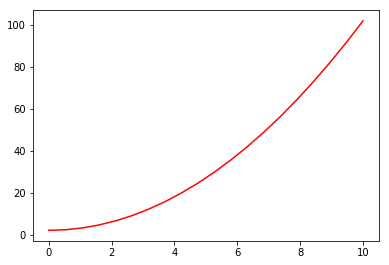

In [29]:
"""方法 1：绘制上方一致的图形
"""
fig = plt.figure() # 新建图形对象

axes = fig.add_axes([0.5, 0.1, 0.8, 0.8]) # 控制画布的左, 下, 宽度, 高度 (从 0 到 1)

axes.plot(x, y, 'r')

<font color='brown'>**重点：**</font>
上面的绘图代码中，你可能会对 `figure` 和 `axes` 产生疑问。Matplotlib 的 API 设计的非常符合常理，在这里，`figure` 相当于绘画用的画板，而 `axes` 则相当于铺在画板上的画布。我们将图像绘制在画布上，于是就有了 `plot`，`set_xlabel` 等操作。

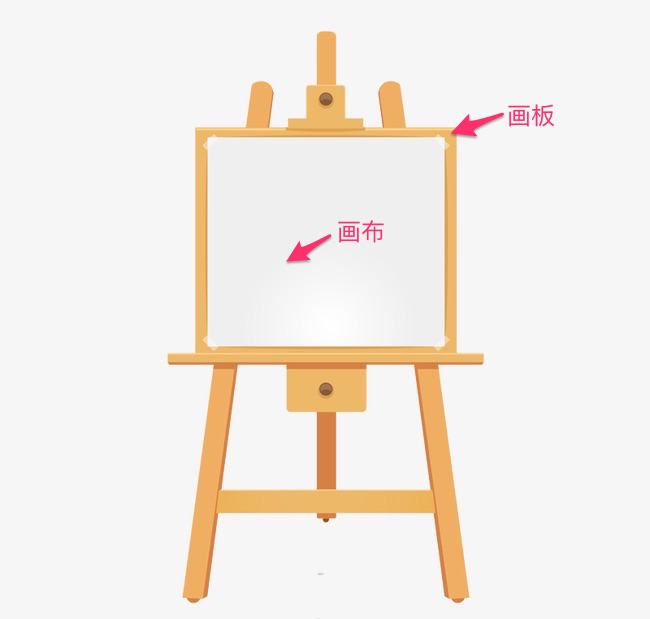

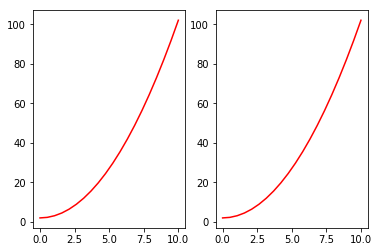

In [8]:
"""同样，我们可以绘制子图
"""
fig, axes = plt.subplots(nrows=1, ncols=2) # 子图为 1 行，2 列

for ax in axes:
    ax.plot(x, y, 'r')

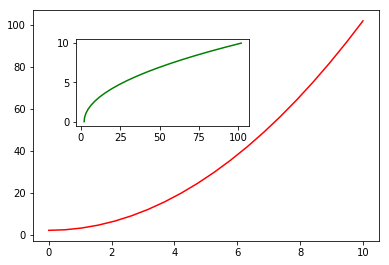

In [9]:
"""还能将一张图绘制在另一张图的内部
"""
fig = plt.figure() # 新建画板

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # 大画布
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # 小画布

# 大画布
axes1.plot(x, y, 'r')

# 小画布
axes2.plot(y, x, 'g')

<font color='brown'>**Tips：**</font>
上面的绘图代码中，你可能学会了使用 `add_axes()` 方法向我们设置的画板 `figure` 中添加画布 `axes`。在 Matplotlib 中，还有一种添加画布的方式，那就是`plt.subplots()`，**它和 `axes` 都等同于画布**。

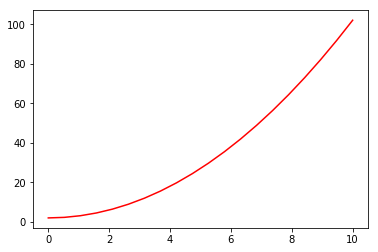

In [10]:
"""方法 2：使用 plt.subplots() 添加画布
"""
fig, axes = plt.subplots()

axes.plot(x, y, 'r')

Matplotlib 绘图非常灵活，我们还可以使用 `add_subplot` 添加画布，使用 `plt` 完成绘图。

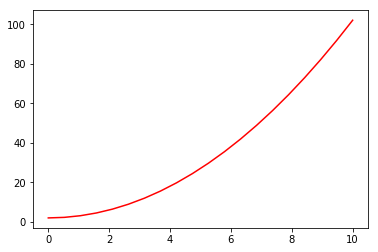

In [11]:
"""方法 3：使用 add_subplot() 添加画布
"""
fig = plt.figure() # 新建图形对象

fig.add_subplot()

plt.plot(x, y, 'r')

对于上面提到的 3 种添加画布的方法，你可能觉得有些杂乱。一般情况下，只需要熟悉其中的一种即可，这里比较推荐使用 `plt.subplots()`，而下面的许多例子也将采用这种方式展开。

另外，既然我们拥有了画板和画布，我们应该也可以调整二者的尺寸，形状吧？当然！

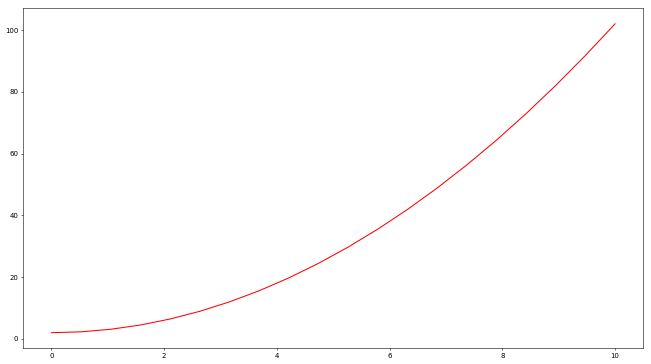

In [12]:
"""调节画布尺寸和显示精度
"""
fig, axes = plt.subplots(figsize=(16,9), dpi=50) # 通过 figsize 调节尺寸, dpi 调节显示精度

axes.plot(x, y, 'r')

### 2.1 图名称、坐标轴名称、图例

In [13]:
"""设置图标题
"""
ax.set_title("title")

Text(0.5,1,'title')

In [14]:
"""设置坐标轴名称
"""
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(185.818,0.5,'y')

In [15]:
"""设置图例
"""
ax.legend(["label1", "label2"])

举例如下：

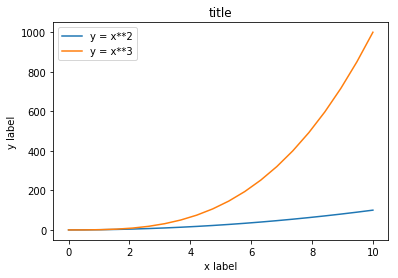

In [36]:
"""绘制包含图标题、坐标轴标题以及图例的图形
"""
fig, axes = plt.subplots()

axes.set_xlabel('x label')
axes.set_ylabel('y label')
axes.set_title('title')

axes.plot(x, x**2)
axes.plot(x, x**3)
axes.legend(["y = x**2", "y = x**3"], loc=2)

图例中的 `loc` 参数标记图例位置，`1，2，3，4` 依次代表：右上角、左上角、左下角，右下角；`0` 代表自适应

### 2.2 线型、颜色、透明度

在 Matplotlib 中，你可以设置线的颜色、透明度等其他属性。

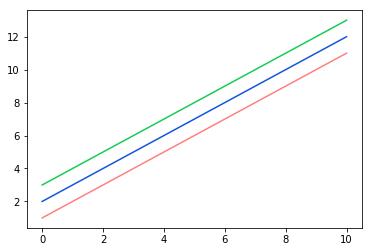

In [17]:
"""设置线的颜色、透明度
"""
fig, axes = plt.subplots()

axes.plot(x, x+1, color="red", alpha=0.5)
axes.plot(x, x+2, color="#1155dd")
axes.plot(x, x+3, color="#15cc55")

而对于线型而言，除了实线、虚线之外，还有很多丰富的线型可供选择。

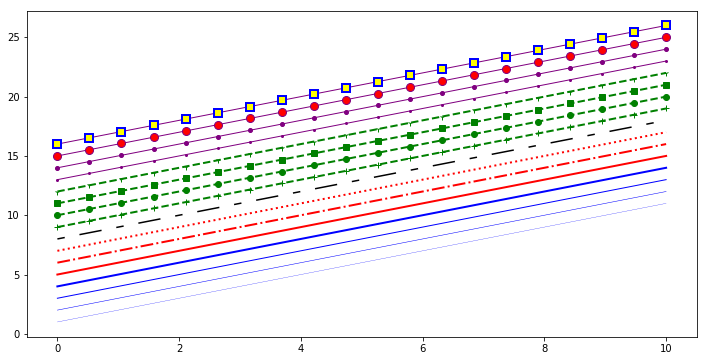

In [18]:
"""设置线型
"""
fig, ax = plt.subplots(figsize=(12,6))

# 线宽
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# 虚线类型
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# 虚线交错宽度
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])

# 符号
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# 符号大小和颜色
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue")

### 2.3 画布网格、坐标轴范围

有些时候，我们可能需要显示画布网格或调整坐标轴范围

(2, 5)

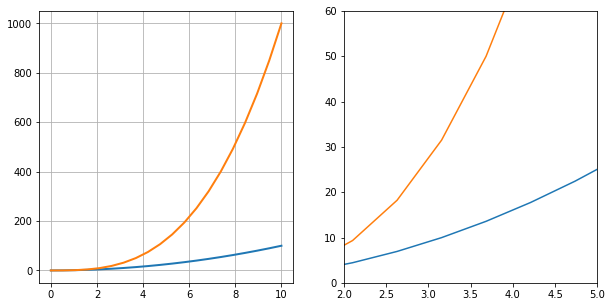

In [19]:
"""设置画布网格和坐标轴范围
"""
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# 显示网格
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# 设置坐标轴范围
axes[1].plot(x, x**2, x, x**3)
axes[1].set_ylim([0, 60])
axes[1].set_xlim([2, 5])

### 2.4 其他 2D 图形

除了线型图，Matplotlib 还支持绘制散点图、柱状图等其他常见图形。

Text(0.5,1,'fill_between')

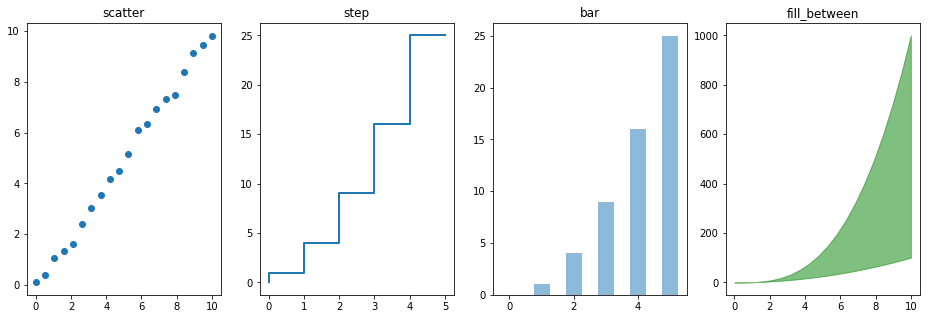

In [20]:
"""绘制散点图、梯步图、条形图、面积图
"""
n = np.array([0,1,2,3,4,5])

fig, axes = plt.subplots(1, 4, figsize=(16,5))

axes[0].scatter(x, x + 0.25*np.random.randn(len(x)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between")

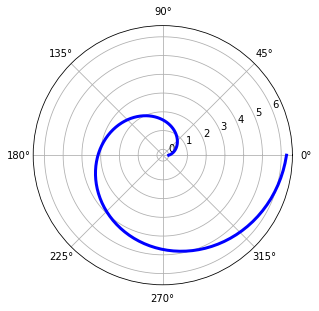

In [21]:
"""绘制雷达图
"""
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3)

(-4.16438712665383, 4.286929798449418)

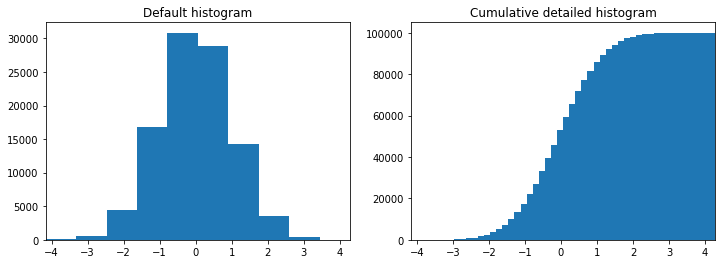

In [22]:
"""绘制直方图
"""
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)))

In [23]:
# 生成示例数据
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

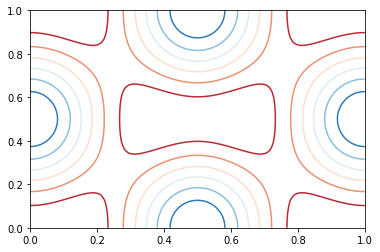

In [24]:
"""绘制等高线图
"""
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### 2.5 3D 图形

使用 Matplotlib 绘制 3D 图形的过程中，我们首先需要导入 `Axes3D` 类，并通过 `projection='3d'` 参数指定绘制 3D 图形。由于 3D 图形的绘制在机器学习中并不经常遇见，这里不做更多的介绍。

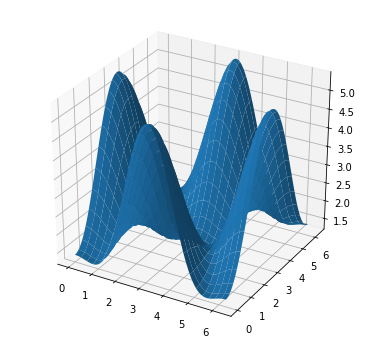

In [25]:
"""绘制 3D 表面图
"""
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

# 通过 projection='3d' 指定绘制 3D 图形
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

<font color='brown'>**Tips：**</font>
当我们在桌面环境中绘制 3D 图形时，是可以通过鼠标任意拖动角度的，但在当前环境中不支持。

下面再绘制一个漂亮且复杂一些的 3D 图形。

(-3.141592653589793, 6.283185307179586)

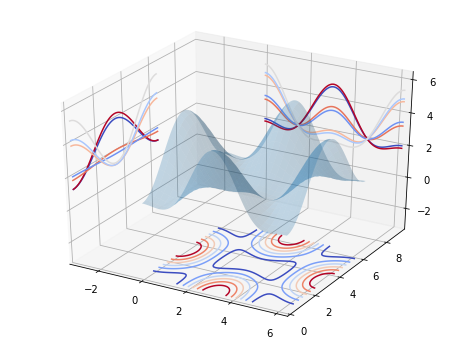

In [26]:
"""绘制复杂一些的 3D 图
"""
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi)
ax.set_ylim3d(0, 3*np.pi)
ax.set_zlim3d(-np.pi, 2*np.pi)

## <a id = "3">3. 实验总结</a>

通过这节实验课程的学习，相信你已经初步掌握了使用 Matplotlib 绘图的方法和技巧。这些内容，在机器学习课程中已足够使用。当然，如果你对 Matplotlib 非常感兴趣，也可以通过实验楼其他课程学习 Matplotlib 的更多内容。本次实验涉及的知识点主要有：
- 兼容 MATLAB 代码风格 API
- 图名称、坐标轴名称、图例
- 线型、颜色、透明度
- 画布网格、坐标轴范围
- 其他 2D 图形
- 3D 图形